In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
file_path = "windpowerdata.csv"  # Update with actual dataset path
df = pd.read_csv(file_path)

In [3]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
df['Time'] = pd.to_datetime(df['Time'])

In [7]:
df=df.set_index('Time')

In [6]:
df.corr()['Power'].sort_values(ascending=False)

Power                  1.000000
windspeed_100m         0.778704
windspeed_10m          0.732801
windgusts_10m          0.662677
winddirection_100m     0.171619
winddirection_10m      0.157623
Time                  -0.011625
relativehumidity_2m   -0.070360
temperature_2m        -0.207101
dewpoint_2m           -0.223739
Name: Power, dtype: float64

In [9]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [10]:
# Convert temperature and dew point from °F to °C
df['temperature_2m'] = (df['temperature_2m'] - 32) * 5/9
df['dewpoint_2m'] = (df['dewpoint_2m'] - 32) * 5/9

# Convert wind speed & gusts from m/s to km/h
df['windspeed_10m'] = df['windspeed_10m'] * 3.6
df['windspeed_100m'] = df['windspeed_100m'] * 3.6
df['windgusts_10m'] = df['windgusts_10m'] * 3.6

# Ensure wind direction 0° is treated as 360°
df['winddirection_10m'] = df['winddirection_10m'].replace(0, 360)
df['winddirection_100m'] = df['winddirection_100m'].replace(0, 360)

# Select relevant features
features = [
    'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
    'windspeed_10m', 'windspeed_100m', 'windgusts_10m',
    'winddirection_10m', 'winddirection_100m'
]
target = 'Power'

# Drop any missing values
df.head()


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
Time,,,,,,,,,
2017-01-02 00:00:00,-1.944444,85,-4.166667,5.184,4.536,146,162,5.04,0.1635
2017-01-02 01:00:00,-2.000000,86,-4.055556,7.416,14.364,151,158,15.84,0.1424
2017-01-02 02:00:00,-2.888889,91,-4.166667,4.680,10.008,148,150,11.52,0.1214
2017-01-02 03:00:00,-2.555556,88,-4.277778,4.680,9.684,58,105,5.76,0.1003
2017-01-02 04:00:00,-2.611111,88,-4.388889,8.892,15.948,58,84,14.40,0.0793


In [11]:
# Split dataset into train & test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluating the model, calculating metrics:

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the coefficients and intercept:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [-0.14273033 -0.04598121  0.1169869  -0.06662854  0.22895707  0.06257619
  0.00165064  0.00421301]
Intercept: 0.4059359360730595
Mean Squared Error: 0.03155915992250253
Mean Absolute Error: 0.14032167408494284
R-squared: 0.6186318560673472


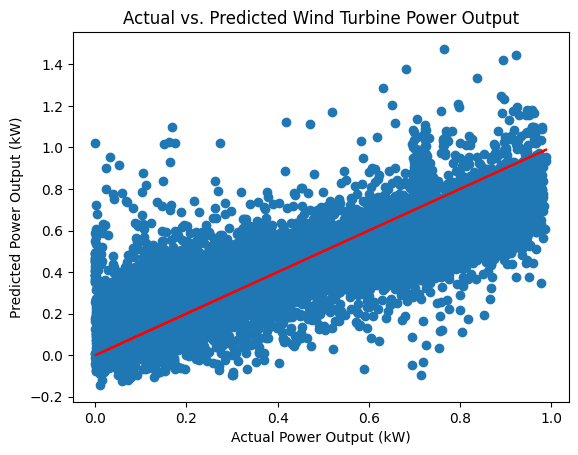

In [22]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs. Predicted Wind Turbine Power Output")

## Displaying the plot using matplotlib's show() function:

plt.show()

In [25]:
import pickle

# Save model and scaler
with open("wind_power_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [38]:
import requests
import pandas as pd
import numpy as np
import pickle

# Load the saved model and scaler
with open("wind_power_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

def get_wind_data(latitude: float, longitude: float, start_date: str, end_date: str) -> pd.DataFrame:
    """
    Fetch real-time wind power data from Open-Meteo API for a specific location and time range.
    """
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "hourly": "temperature_2m,relative_humidity_2m,dew_point_2m,wind_speed_10m,wind_speed_80m,wind_direction_10m,wind_direction_80m,wind_gusts_10m",
        "timezone": "auto",
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        raise Exception(f"Error fetching data from API: {e}")

    if 'hourly' not in data or not data['hourly'].get('time'):
        raise Exception("No hourly data available from API for the specified period.")

    # Convert response to DataFrame
    df = pd.DataFrame({
        'timestamp': pd.to_datetime(data['hourly']['time']),
        'temperature_2m': data['hourly'].get('temperature_2m'),
        'relativehumidity_2m': data['hourly'].get('relative_humidity_2m'),
        'dewpoint_2m': data['hourly'].get('dew_point_2m'),
        'windspeed_10m': np.array(data['hourly'].get('wind_speed_10m')) * 3.6,  # Convert m/s to km/h
        'windspeed_100m': np.array(data['hourly'].get('wind_speed_80m')) * 3.6,  # Approximate for 100m
        'winddirection_10m': np.where(np.array(data['hourly'].get('wind_direction_10m')) == 0, 360, data['hourly'].get('wind_direction_10m')),
        'winddirection_100m': np.where(np.array(data['hourly'].get('wind_direction_80m')) == 0, 360, data['hourly'].get('wind_direction_80m')),
        'windgusts_10m': np.array(data['hourly'].get('wind_gusts_10m')) * 3.6,  # Convert m/s to km/h
    })

    return df

def predict_wind_power(latitude: float, longitude: float, start_date: str, end_date: str):
    """
    Fetch weather data and predict wind power output.
    """
    df = get_wind_data(latitude, longitude, start_date, end_date)
    print(df.iloc[[5]])
    print(df.iloc[[15]])
    # Select only model input features
    features = [
        'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
        'windspeed_10m', 'windspeed_100m', 'windgusts_10m',
        'winddirection_10m', 'winddirection_100m'
    ]
    
    # Standardize data using saved scaler
    X_scaled = scaler.transform(df[features])

    # Predict power output
    df['Predicted_Power'] = model.predict(X_scaled)
    
    df['Predicted_Power'] = df['Predicted_Power'].clip(0, 1) * 100

    return df[['timestamp', 'Predicted_Power']]



In [39]:
# Example usage
latitude, longitude = 37.7749, -122.4194  # San Francisco
start_date, end_date = "2025-02-10", "2025-02-10"

predictions = predict_wind_power(latitude, longitude, start_date, end_date)
print(predictions)


            timestamp  temperature_2m  relativehumidity_2m  dewpoint_2m  \
5 2025-02-10 05:00:00             7.0                   70          1.9   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
5          12.24           11.88                 58                  49   

   windgusts_10m  
5          12.96  
             timestamp  temperature_2m  relativehumidity_2m  dewpoint_2m  \
15 2025-02-10 15:00:00            11.6                   42         -0.9   

    windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
15           36.0           45.72                308                 315   

    windgusts_10m  
15          40.32  
             timestamp  Predicted_Power
0  2025-02-10 00:00:00        11.496954
1  2025-02-10 01:00:00        15.070762
2  2025-02-10 02:00:00        11.178892
3  2025-02-10 03:00:00        18.258361
4  2025-02-10 04:00:00        16.826054
5  2025-02-10 05:00:00         8.752542
6  2025-02-10 06:00:00         4.8